In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

img_size = 64
num_images_per_class = 50
classes = ["line", "circle", "cross"]
data_dir = "/content/synthetic_gestures"

os.makedirs(data_dir, exist_ok=True)
for cls in classes:
    os.makedirs(os.path.join(data_dir, cls), exist_ok=True)

def create_image(label):
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    if label == "line":
        cv2.line(img, (10, 10), (54, 54), 255, 2)
    elif label == "circle":
        cv2.circle(img, (32, 32), 20, 255, 2)
    elif label == "cross":
        cv2.line(img, (10, 54), (54, 10), 255, 2)
        cv2.line(img, (10, 10), (54, 54), 255, 2)
    return img

for cls in classes:
    for i in range(num_images_per_class):
        img = create_image(cls)
        filename = f"{cls}_{i}.png"
        cv2.imwrite(os.path.join(data_dir, cls, filename), img)

print("✅ Synthetic dataset created successfully.")


✅ Synthetic dataset created successfully.


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_path = "/content/synthetic_gestures"
classes = ["line", "circle", "cross"]
img_size = 64

images = []
labels = []

for idx, cls in enumerate(classes):
    class_path = os.path.join(data_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        labels.append(idx)

images = np.array(images) / 255.0
images = images.reshape(-1, img_size, img_size, 1)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print("✅ Dataset Loaded")
print("🔢 Training Samples:", len(X_train))
print("🔢 Testing Samples:", len(X_test))


✅ Dataset Loaded
🔢 Training Samples: 120
🔢 Testing Samples: 30


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,891 (3.14 MB)

 Trainable params: 821,891 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.6125 - loss: 0.7077 - val_accuracy: 1.0000 - val_loss: 0.0144
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 7.9587e-05
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 1.0000 - loss: 4.3832e-05 - val_accuracy: 1.0000 - val_loss: 8.7420e-07
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 1.0000 - loss: 5.0594e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 1.0000 - los

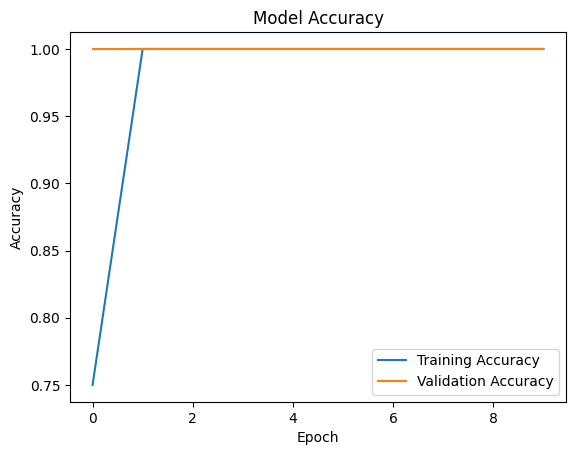

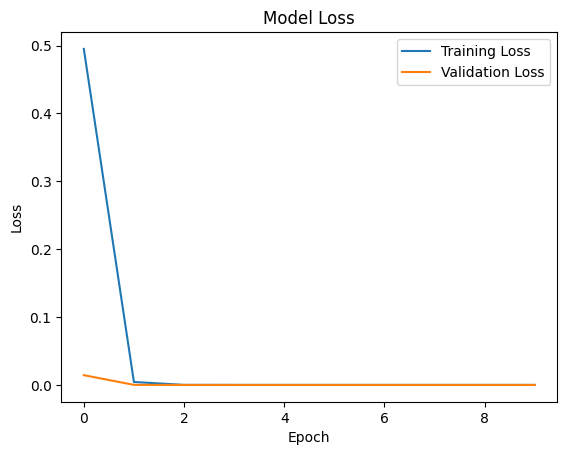

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"❌ Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 1.0000 - loss: 0.0000e+00
✅ Test Accuracy: 100.00%
❌ Test Loss: 0.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
👉 Actual: 1 | 🤖 Predicted: 1


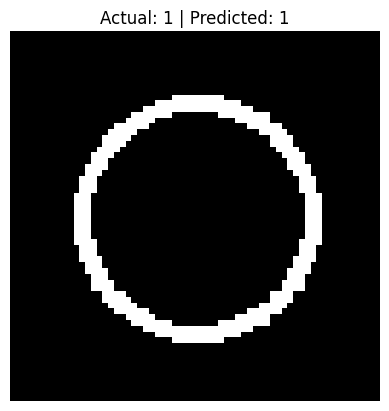

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
👉 Actual: 2 | 🤖 Predicted: 2


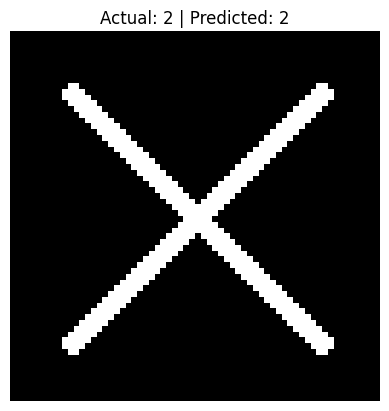

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
👉 Actual: 2 | 🤖 Predicted: 2


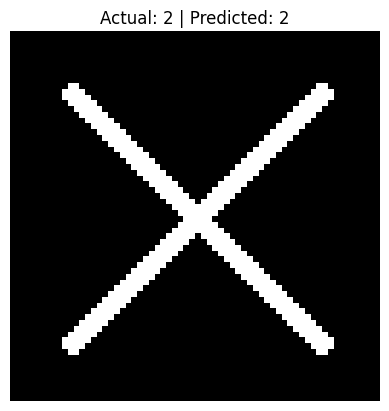

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
👉 Actual: 0 | 🤖 Predicted: 0


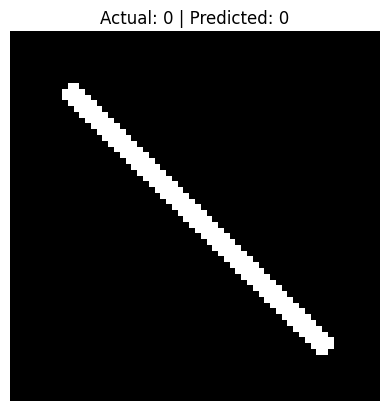

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
👉 Actual: 0 | 🤖 Predicted: 0


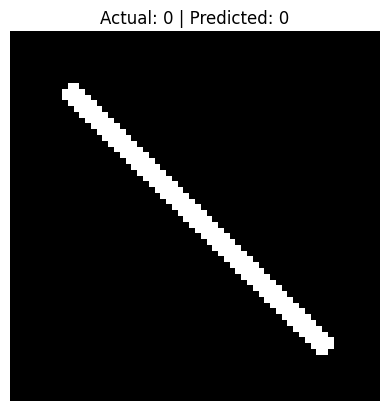

In [ ]:
import random

for i in range(5):
    idx = random.randint(0, len(X_test) - 1)
    sample = X_test[idx]
    actual = y_test[idx]

    prediction = model.predict(sample.reshape(1, 64, 64, 1))
    predicted_label = np.argmax(prediction)

    print(f"👉 Actual: {actual} | 🤖 Predicted: {predicted_label}")

    plt.imshow(sample.reshape(64, 64), cmap='gray')
    plt.title(f"Actual: {actual} | Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()
